### Protein Corona

DLS Configuration

Termocycle: 10 minutes at 25ºC and 500 RPM

#### Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
df = pd.read_csv('DLS/data.txt',sep='\t',skiprows=1,decimal=',')

In [4]:
dim,std = [],[]
for i,value in enumerate(list(df['d.nm'])):

    if i>0 and i%3==0:
        mean = np.mean(values)
        std_val = np.std(values)
        dim.append(mean)
        std.append(std_val)
    
    if i % 3 == 0:
        values = []
        values.append(float(value))
    else:
        values.append(float(value))

In [5]:
prot = [0,12,24,48,72,96,120]

In [46]:
# 1 Dalton = 1000 g/mol
# 44.88 KDa = 44880 Da
# 44.880.000 g/mol

protein_mw = 44880000 # g/mol
# protein_mw = 44880000000 # mg/mol

In [47]:
# Definindo os parâmetros
concentracao_proteina_mg_ml = 1  # concentração da proteína em mg/ml
volume_solucao_ul = 600  # volume da solução em uL
titulos_ul = [0,12,24,48,72,96,120]  # volumes a serem adicionados em uL

# Calculando a concentração em mg/ml após as adições
concentracoes_resultantes = []
for volume_adicionado in titulos_ul:
    # Calcular o novo volume total
    novo_volume_ul = volume_solucao_ul + volume_adicionado  # volume total após adição
    # Calcular a nova concentração da proteína
    nova_concentracao_mg_ml = (concentracao_proteina_mg_ml * volume_adicionado * 0.001) / (novo_volume_ul*0.001)
    nova_concentracao_M = nova_concentracao_mg_ml/(protein_mw)
    concentracoes_resultantes.append(nova_concentracao_M)

concentracoes_resultantes

[0.0,
 4.368949005627206e-10,
 8.569861511037983e-10,
 1.650491846570278e-09,
 2.387318563789152e-09,
 3.073329645337759e-09,
 3.7136066547831253e-09]

In [48]:
prot = concentracoes_resultantes

In [49]:
def binding_curve(P, R_max, Kd):
    return R_max * P / (Kd + P)

initial_guess = [130, np.mean(prot)]

popt, pcov = curve_fit(binding_curve, prot[2:],dim[2:], p0=initial_guess)
R_max, Kd = popt

print(f"Estimated R_max: {R_max}")
print(f"Estimated Kd: {Kd}")

P_fit = np.linspace(min(prot[2:]), max(prot[2:]), 100)
R_fit = binding_curve(P_fit, *popt)

Estimated R_max: 130.97542544835326
Estimated Kd: 5.92382324987388e-11


In [58]:
print('CBM',Kd)

CBM 5.92382324987388e-11


In [59]:
def deltaG(T,Kd):
    R = 8.314 # J/mol*K
    G = R*T*np.log(Kd) # J/mol
    avogrado = 6.022e23
    J_to_eV = 1.602e-19
    G_eV = G/(avogrado*J_to_eV)
    return round(G_eV,4)

In [60]:
print('CBM:',deltaG(300,Kd),'eV')

CBM: -0.6088 eV


In [68]:
angstrom_squared = 28.9*45.2  # área em Å²
conversion_factor = 0.01  # 1 Å² = 0.01 nm²

nm_squared = angstrom_squared * conversion_factor
nm_squared

13.0628

In [70]:
-0.44/(9.86),-0.60/(13.0628)

(-0.04462474645030426, -0.04593195945739045)

C:\Users\pedro220068\AppData\Local\Temp\ipykernel_30124\3279843677.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--o" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(prot[:],dim[:],yerr=std[:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


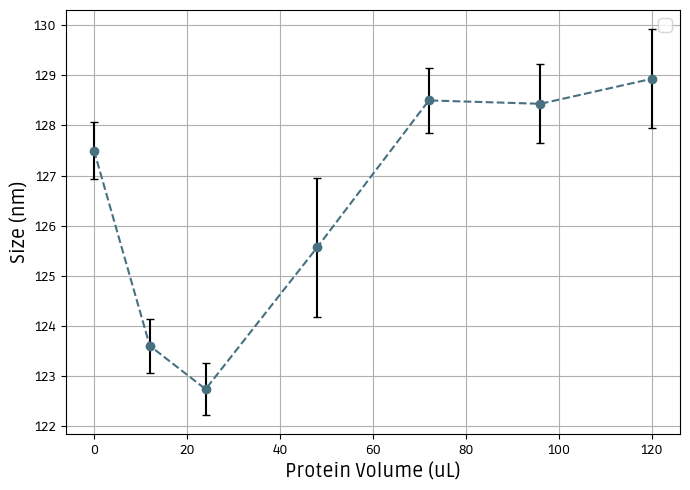

In [11]:
plt.figure(figsize=(7,5))
plt.errorbar(prot[:],dim[:],yerr=std[:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")
plt.xlabel('Protein Volume (uL)',fontsize=14),plt.ylabel('Size (nm)',fontsize=14)

plt.grid(),plt.tight_layout()
plt.legend(fontsize=12)
# plt.xlim(min(prot[1:]),max(prot[1:]))
# plt.xlim(20,125)
# plt.ylim(122,130)

# plt.savefig('results/DLS/DLS.png',transparent=True,dpi=700)
plt.show()

C:\Users\pedro220068\AppData\Local\Temp\ipykernel_19384\2719954888.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--o" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(prot[2:],dim[2:],yerr=std[2:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")


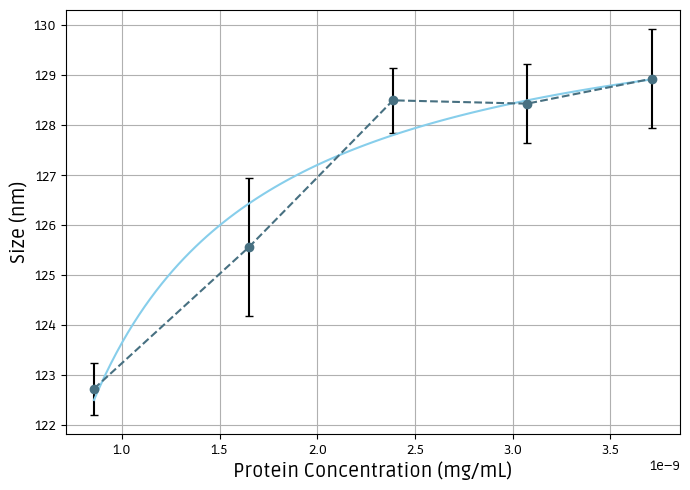

In [57]:
# plt.scatter(prot[1:],dim[1:])
plt.figure(figsize=(7,5))
plt.errorbar(prot[2:],dim[2:],yerr=std[2:],capsize=3,fmt="r--o",color='#477081',ecolor = "black")

plt.xlabel('Protein Concentration (mg/mL)',fontsize=14),plt.ylabel('Size (nm)',fontsize=14)
plt.plot(P_fit, R_fit, label=f'Fitted curve (Kd={Kd:.4f})', color='skyblue')

plt.grid(),plt.tight_layout()
# plt.legend(fontsize=12)
# plt.xlim(min(prot[1:]),max(prot[1:]))

plt.savefig('results/DLS/DLS_kd.png',transparent=True,dpi=700)
plt.show()